<a href="https://colab.research.google.com/github/stardust453/Customer-Clustering-for-eCommerce-Transactions-dataset/blob/main/satyam_sahu_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task 1: Exploratory Data Analysis (EDA) and Business Insights**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display basic information about the datasets
for df, name in zip([customers, products, transactions], ['Customers', 'Products', 'Transactions']):
    print(f"\n{name} Dataset:")
    print(df.info())
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nFirst few rows:")
    print(df.head())


Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Missing values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

First few rows:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data colum

In [ ]:
# Handle data types and missing values
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

products['Price'] = pd.to_numeric(products['Price'])

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Quantity'] = pd.to_numeric(transactions['Quantity'])
transactions['TotalValue'] = pd.to_numeric(transactions['TotalValue'])
transactions['Price'] = pd.to_numeric(transactions['Price'])


In [ ]:
# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

# Customer analysis
print("\nCustomer Statistics:")
print(customers['Region'].value_counts(normalize=True))
print("\nCustomer signup date range:")
print(f"Earliest: {customers['SignupDate'].min()}")
print(f"Latest: {customers['SignupDate'].max()}")

# Product analysis
print("\nProduct Statistics:")
print(products['Category'].value_counts())
print("\nProduct price statistics:")
print(products['Price'].describe())

# Transaction analysis
print("\nTransaction Statistics:")
print(transactions['TransactionDate'].describe())
print("\nTotal sales by year:")
print(transactions.groupby(transactions['TransactionDate'].dt.year)['TotalValue'].sum())


Customer Statistics:
Region
South America    0.295
Europe           0.250
North America    0.230
Asia             0.225
Name: proportion, dtype: float64

Customer signup date range:
Earliest: 2022-01-22 00:00:00
Latest: 2024-12-28 00:00:00

Product Statistics:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

Product price statistics:
count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64

Transaction Statistics:
count                             1000
mean     2024-06-23 15:33:02.768999936
min                2023-12-30 15:29:12
25%         2024-03-25 22:05:34.500000
50%         2024-06-26 17:21:52.500000
75%                2024-09-19 14:19:57
max                2024-12-28 11:00:00
Name: TransactionDate, dtype: object

Total sales by year:
TransactionDate
2023      3769.52
2024    686226.04
Name: T

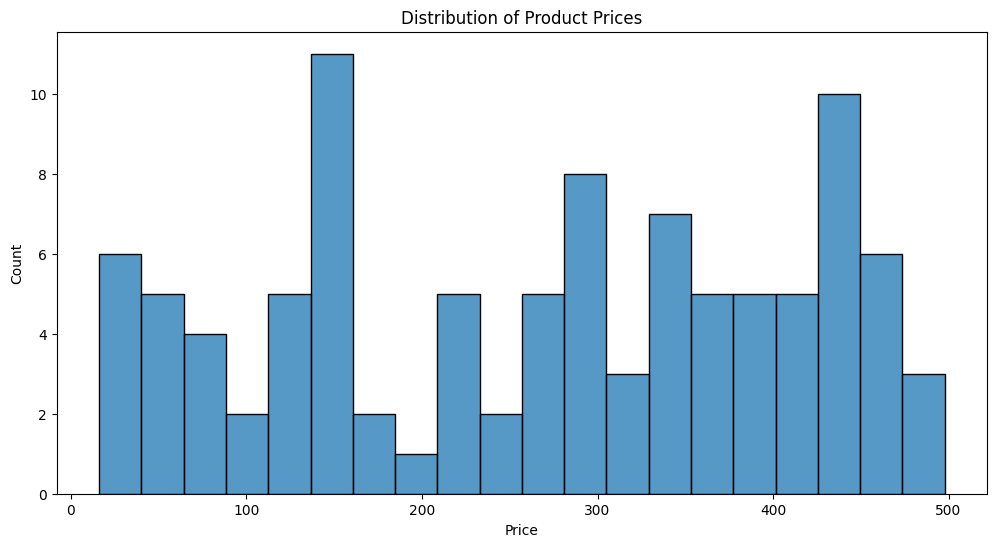

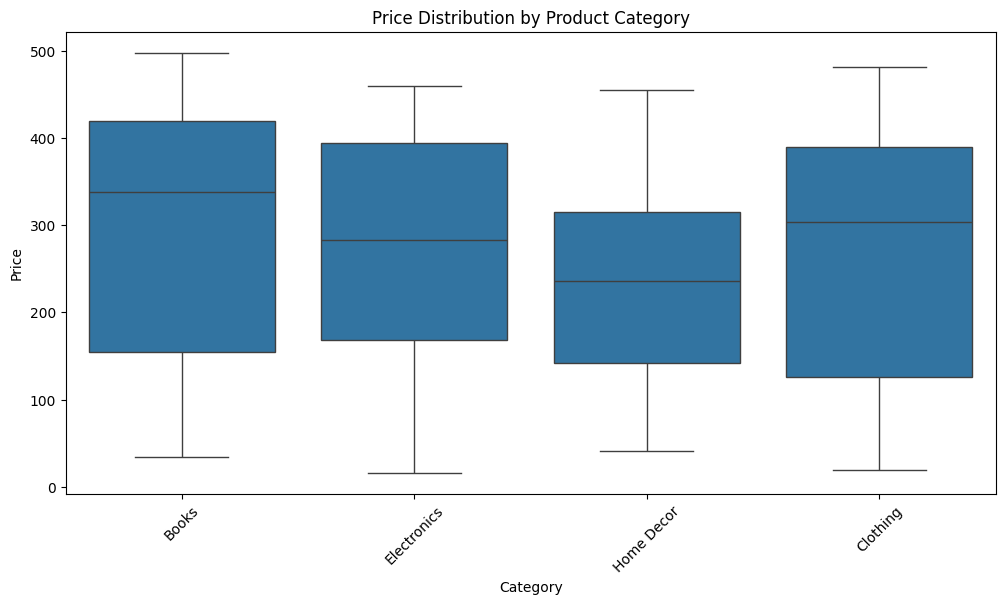

In [ ]:
# Visualizations
plt.figure(figsize=(12, 6))
sns.histplot(data=products, x='Price', bins=20)
plt.title('Distribution of Product Prices')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=products, x='Category', y='Price')
plt.title('Price Distribution by Product Category')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Customer segmentation based on total spend
customer_spend = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spend['SpendCategory'] = pd.qcut(customer_spend['TotalValue'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
print("\nCustomer Spend Categories:")
print(customer_spend['SpendCategory'].value_counts(normalize=True))



Customer Spend Categories:
SpendCategory
Low          0.251256
Medium       0.251256
Very High    0.251256
High         0.246231
Name: proportion, dtype: float64


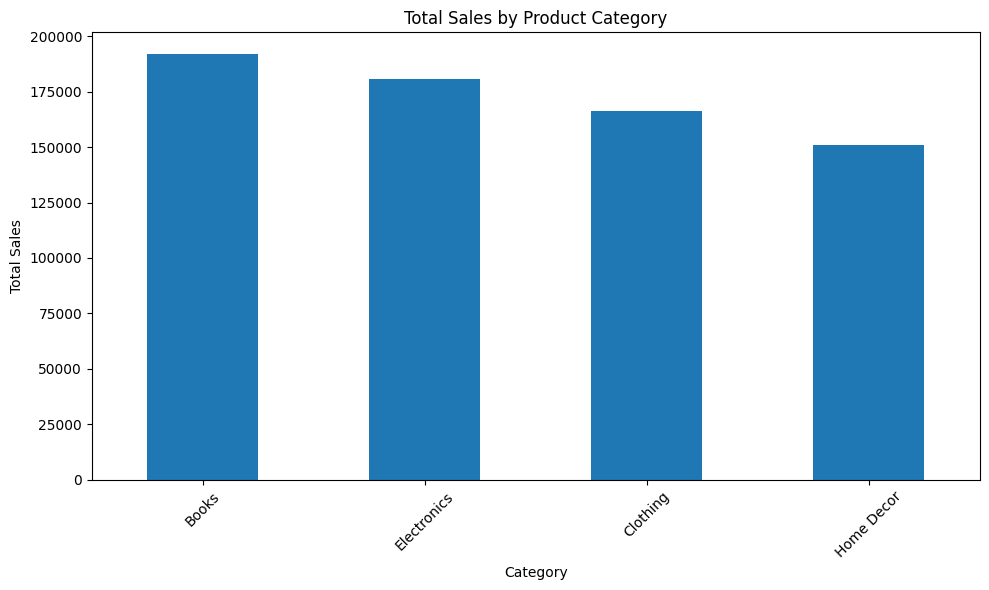

In [ ]:
# Category performance
category_performance = transactions.merge(products[['ProductID', 'Category']], on='ProductID')
category_performance = category_performance.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_performance.plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

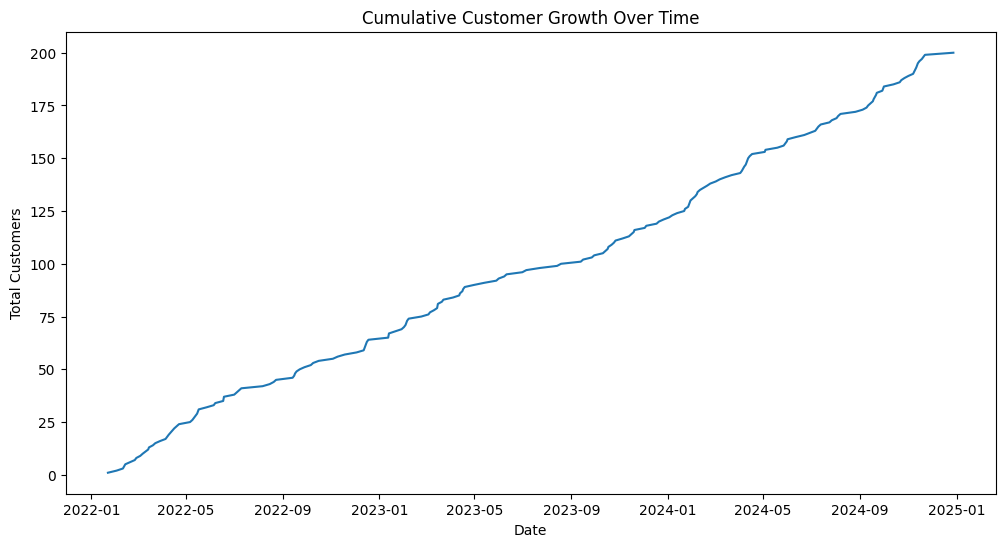

In [ ]:
# Customer acquisition over time
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customer_growth = customers.groupby('SignupDate').size().cumsum()
plt.figure(figsize=(12, 6))
plt.plot(customer_growth.index, customer_growth.values)
plt.title('Cumulative Customer Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Total Customers')
plt.show()

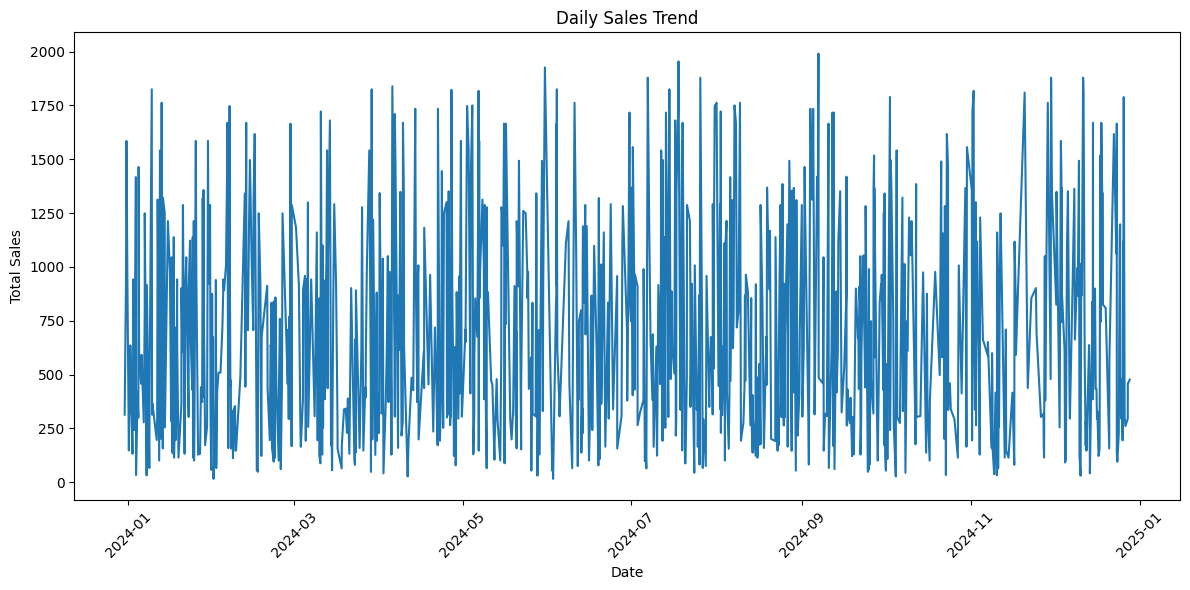

In [ ]:
# Sales trends over time (Time series analysis)
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
daily_sales = transactions.groupby('TransactionDate')['TotalValue'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['TransactionDate'], daily_sales['TotalValue'])
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

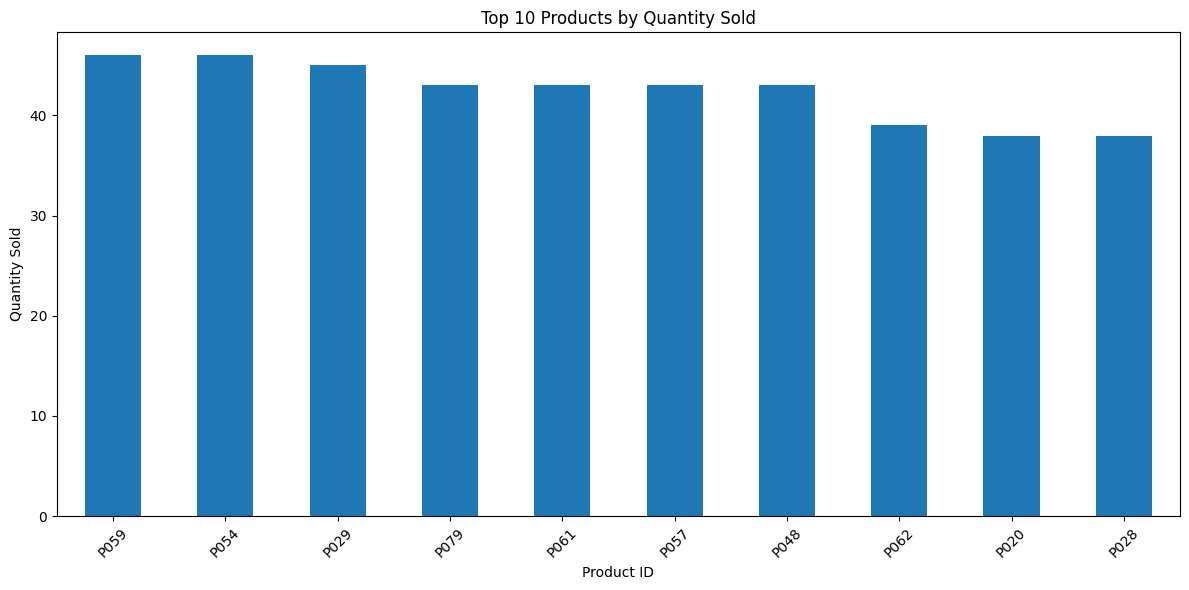

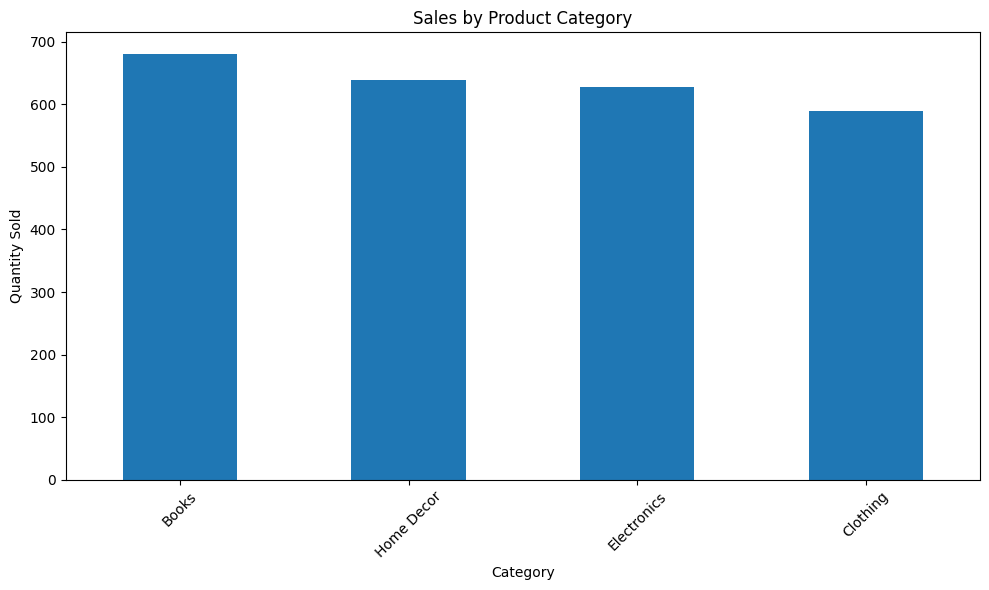

In [ ]:
# Popular products and categories
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)  # Changed 'descending=True' to 'ascending=False'
top_categories = transactions.merge(products, on='ProductID').groupby('Category')['Quantity'].sum().sort_values(ascending=False)  # Changed 'descending=True' to 'ascending=False'

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

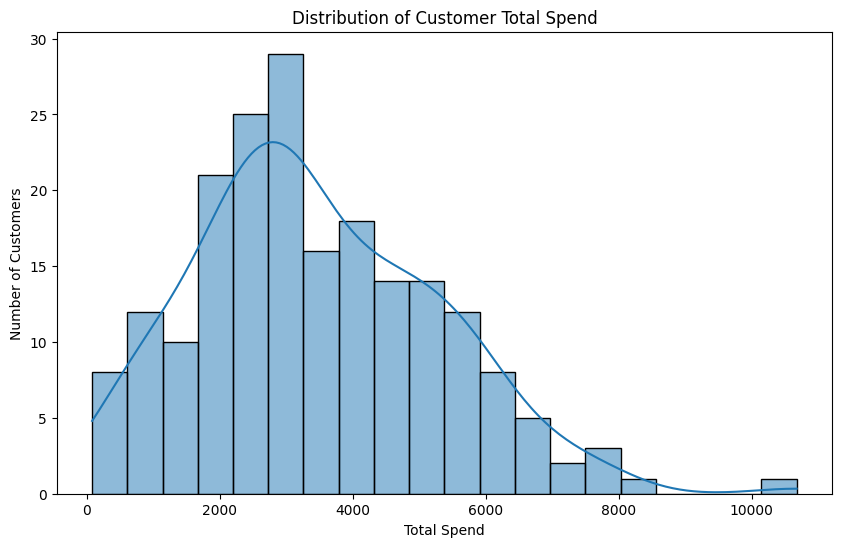

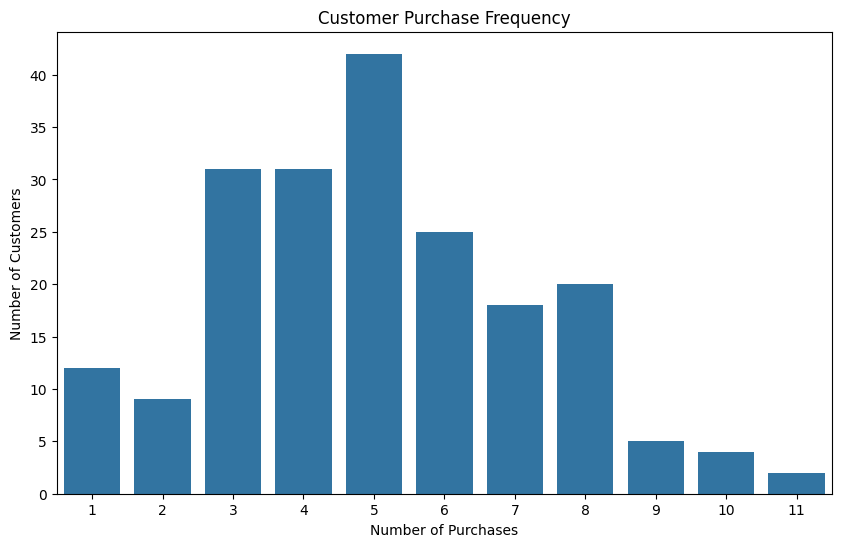

In [ ]:
# Customer purchasing behavior
customer_purchase_frequency = transactions.groupby('CustomerID').size().value_counts().sort_index()
customer_total_spend = transactions.groupby('CustomerID')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
sns.histplot(customer_total_spend, bins=20, kde=True)
plt.title('Distribution of Customer Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=customer_purchase_frequency.index, y=customer_purchase_frequency.values)
plt.title('Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

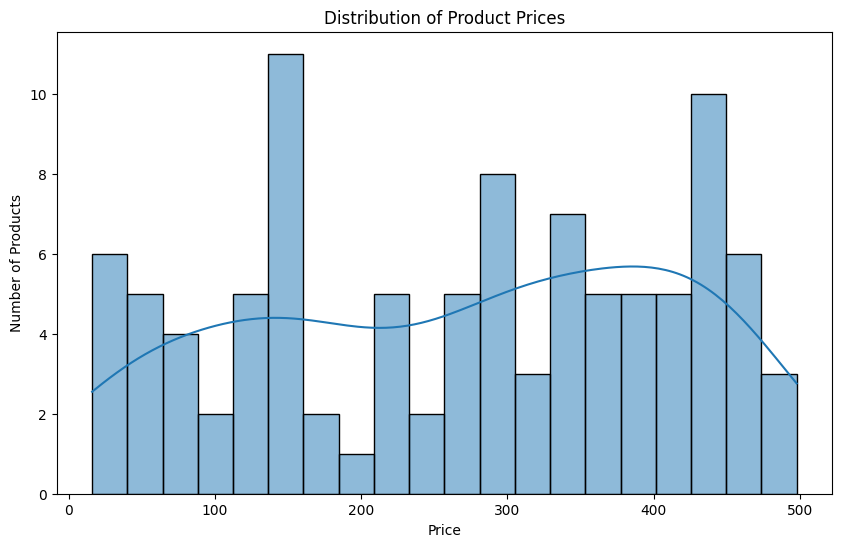

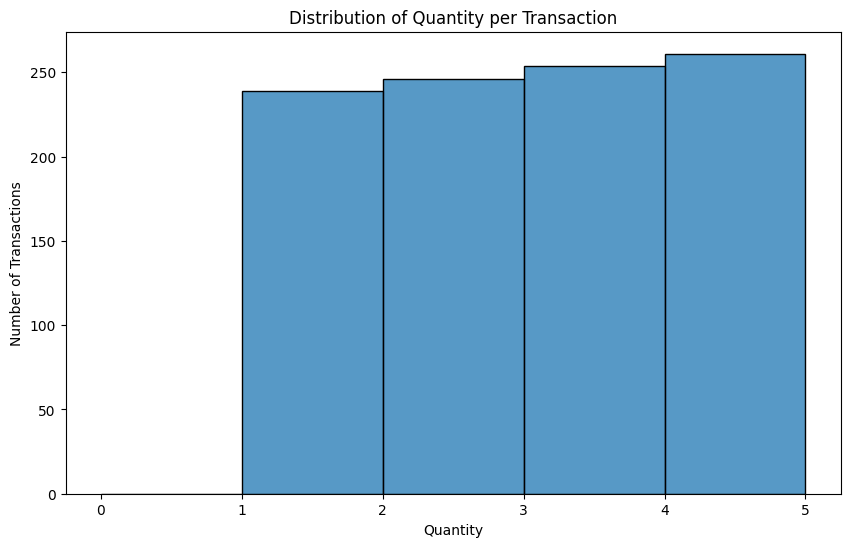

In [ ]:
# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.show()

# Quantity distribution in transactions
plt.figure(figsize=(10, 6))
sns.histplot(transactions['Quantity'], bins=range(0, transactions['Quantity'].max() + 2, 1), kde=False)
plt.title('Distribution of Quantity per Transaction')
plt.xlabel('Quantity')
plt.ylabel('Number of Transactions')
plt.show()